In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor 

# Data inglobation from HGD mutation database
[link](https://hgddatabase.cvtisr.sk/files/Predicted%20Structural%20Effect%20of%20the%20HGD%20gene%20Missense%20Variants_139M_new.pdf) of the dataset.

In [2]:
df = pd.read_csv('../datasets/df_with_scores.csv')

In [3]:
new_features = pd.read_csv('../datasets/hgddatabase_scores.csv')

In [4]:
new_features.head()

,Variant,Protein Variant,Exon,Variant Class,Destabilise Monomer?,Destabilise Hexamer?,Comments,Dist. to Interface,Dist. to Fe(within protomer),Dist. to Fe(neighbouring protomer),Dist. to Substrate(within protomer),mCSM (ΔΔG Kcal/mol),protomer_DUET(ΔΔG Kcal/mol),mCSM-PPI (ΔΔG Kcal/mol)
0,G123A,p.(Gly123Ala),6.0,Protomer destabilisation; Hexamer disruption,No,Mildly,Positive phi glycine,5.194,20.542,25.832,20.602,-0.227,0.082,-0.408
1,G270R,p.(Gly270Arg),11.0,Protomer destabilisation; Hexamer disruption,Yes,Yes,NaN,6.109,36.522,17.370,34.754,-1.094,-0.838,-2.435
2,R225P,p.(Arg225Pro),10.0,Hexamer disruption,No,Yes,NaN,3.004,28.991,19.555,26.111,0.253,0.289,-2.216
3,G170A,p.(Gly170Ala),8.0,Protomer destabilisation; Hexamer disruption,Yes,Yes,Positive phi glycine,11.034,36.343,22.777,33.916,-0.757,-0.484,-1.004
4,G205D,p.(Gly205Asp),9.0,Protomer destabilisation,Yes,No,NaN,5.894,25.554,17.104,25.457,-1.405,-1.550,-0.141


In [5]:
new_features.drop(columns=['Variant Class','Comments'], inplace=True)

In [6]:
new_features.dropna(inplace=True)

In [7]:
df = df.join(new_features.set_index('Variant'), on='Protein change allele 1 ', rsuffix='_1')

In [8]:
df = df.join(new_features.set_index('Variant'), on='Protein change allele 2', rsuffix='_2')

In [9]:
df.head()

,Protein change allele 1,Protein change allele 2,structure_allele1,structure_allele2,pdb_file_allele1,pdb_file_allele2,patient,sex,birth,bmi,...,Exon_2,Destabilise Monomer?_2,Destabilise Hexamer?_2,Dist. to Interface_2,Dist. to Fe(within protomer)_2,Dist. to Fe(neighbouring protomer)_2,Dist. to Substrate(within protomer)_2,mCSM (ΔΔG Kcal/mol)_2,protomer_DUET(ΔΔG Kcal/mol)_2,mCSM-PPI (ΔΔG Kcal/mol)_2
0,G161R,His371Profs,<Structure id=G161R>,<Structure id=His371Profs>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/H371fs_9b3dd/H371fs...,101A,F,1963.0,27.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,102A,F,1964.0,24.47,...,8.0,Yes,Yes,20.324,27.695,36.401,23.795,-1.273,-1.325,-1.230
2,G161R,M368V,<Structure id=G161R>,<Structure id=M368V>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/M368V_be390/M368V_b...,105A,F,1958.0,33.98,...,13.0,No,Yes,3.259,9.001,33.799,9.163,-0.510,-0.267,-1.253
3,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,107A,F,1952.0,26.29,...,8.0,Yes,Yes,20.324,27.695,36.401,23.795,-1.273,-1.325,-1.230
4,G161R,G161R,<Structure id=G161R>,<Structure id=G161R>,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,../datasets/ALPHAFOLD PDBs/G161R_c8ba5/G161R_c...,108A,F,1956.0,27.18,...,8.0,Yes,Yes,20.324,27.695,36.401,23.795,-1.273,-1.325,-1.230


In [10]:
# Some patients (like the first) have one frameshift on an allele. since we have dtaa only for MISSENSE mutations we drop these cases
df.dropna(inplace=True)

In [11]:
df.columns

Index(['Protein change allele 1 ', 'Protein change allele 2',
       'structure_allele1', 'structure_allele2', 'pdb_file_allele1',
       'pdb_file_allele2', 'patient', 'sex', 'birth', 'bmi',
       'physical_health_score', 'mental_health_score', 'AKUSSI_jointpain',
       'AKUSSI_spinalpain', 'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living',
       'KOOSsport', 'KOOS_QOL', 'HAQ_hapVAS', 'HAQ_haqDI', 'RMSD_A1',
       'RMSD_all_A1', 'Alignment_A1', 'RMSD_A2', 'RMSD_all_A2', 'Alignment_A2',
       'Protein Variant', 'Exon', 'Destabilise Monomer?',
       'Destabilise Hexamer?', 'Dist. to Interface',
       'Dist. to Fe(within protomer)', 'Dist. to Fe(neighbouring protomer)',
       'Dist. to Substrate(within protomer)', 'mCSM (ΔΔG Kcal/mol)',
       'protomer_DUET(ΔΔG Kcal/mol)', 'mCSM-PPI (ΔΔG Kcal/mol)',
       'Protein Variant_2', 'Exon_2', 'Destabilise Monomer?_2',
       'Destabilise Hexamer?_2', 'Dist. to Interface_2',
       'Dist. to Fe(within protomer)_2',
       'Dist. to Fe(nei

In [12]:
for col in ['Destabilise Monomer?','Destabilise Hexamer?','Destabilise Monomer?_2','Destabilise Hexamer?_2']:
    for i in df.index:
        if df[col][i]=='No':
            df[col][i]=0
        elif df[col][i]=='Yes':
            df[col][i]=1
        elif df[col][i]=='Mildly':
            df[col][i]=0.5

/var/folders/xd/64006ztx62g6gm6fh5jj4src0000gn/T/ipykernel_22367/3288378547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=1
/var/folders/xd/64006ztx62g6gm6fh5jj4src0000gn/T/ipykernel_22367/3288378547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=0
/var/folders/xd/64006ztx62g6gm6fh5jj4src0000gn/T/ipykernel_22367/3288378547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=0.5


In [13]:
#TODO: serve davvero?
cols=['Exon','Dist. to Interface','Dist. to Fe(within protomer)',
      'Dist. to Fe(neighbouring protomer)','Dist. to Substrate(within protomer)','mCSM (ΔΔG Kcal/mol)','protomer_DUET(ΔΔG Kcal/mol)',
      'Exon_2','Dist. to Interface_2','Dist. to Fe(within protomer)_2',
      'Dist. to Fe(neighbouring protomer)_2','Dist. to Substrate(within protomer)_2','mCSM (ΔΔG Kcal/mol)_2','protomer_DUET(ΔΔG Kcal/mol)_2',
      'Destabilise Monomer?','Destabilise Hexamer?','Destabilise Monomer?_2','Destabilise Hexamer?_2']

df[cols]=df[cols].apply(pd.to_numeric)

# Correlation

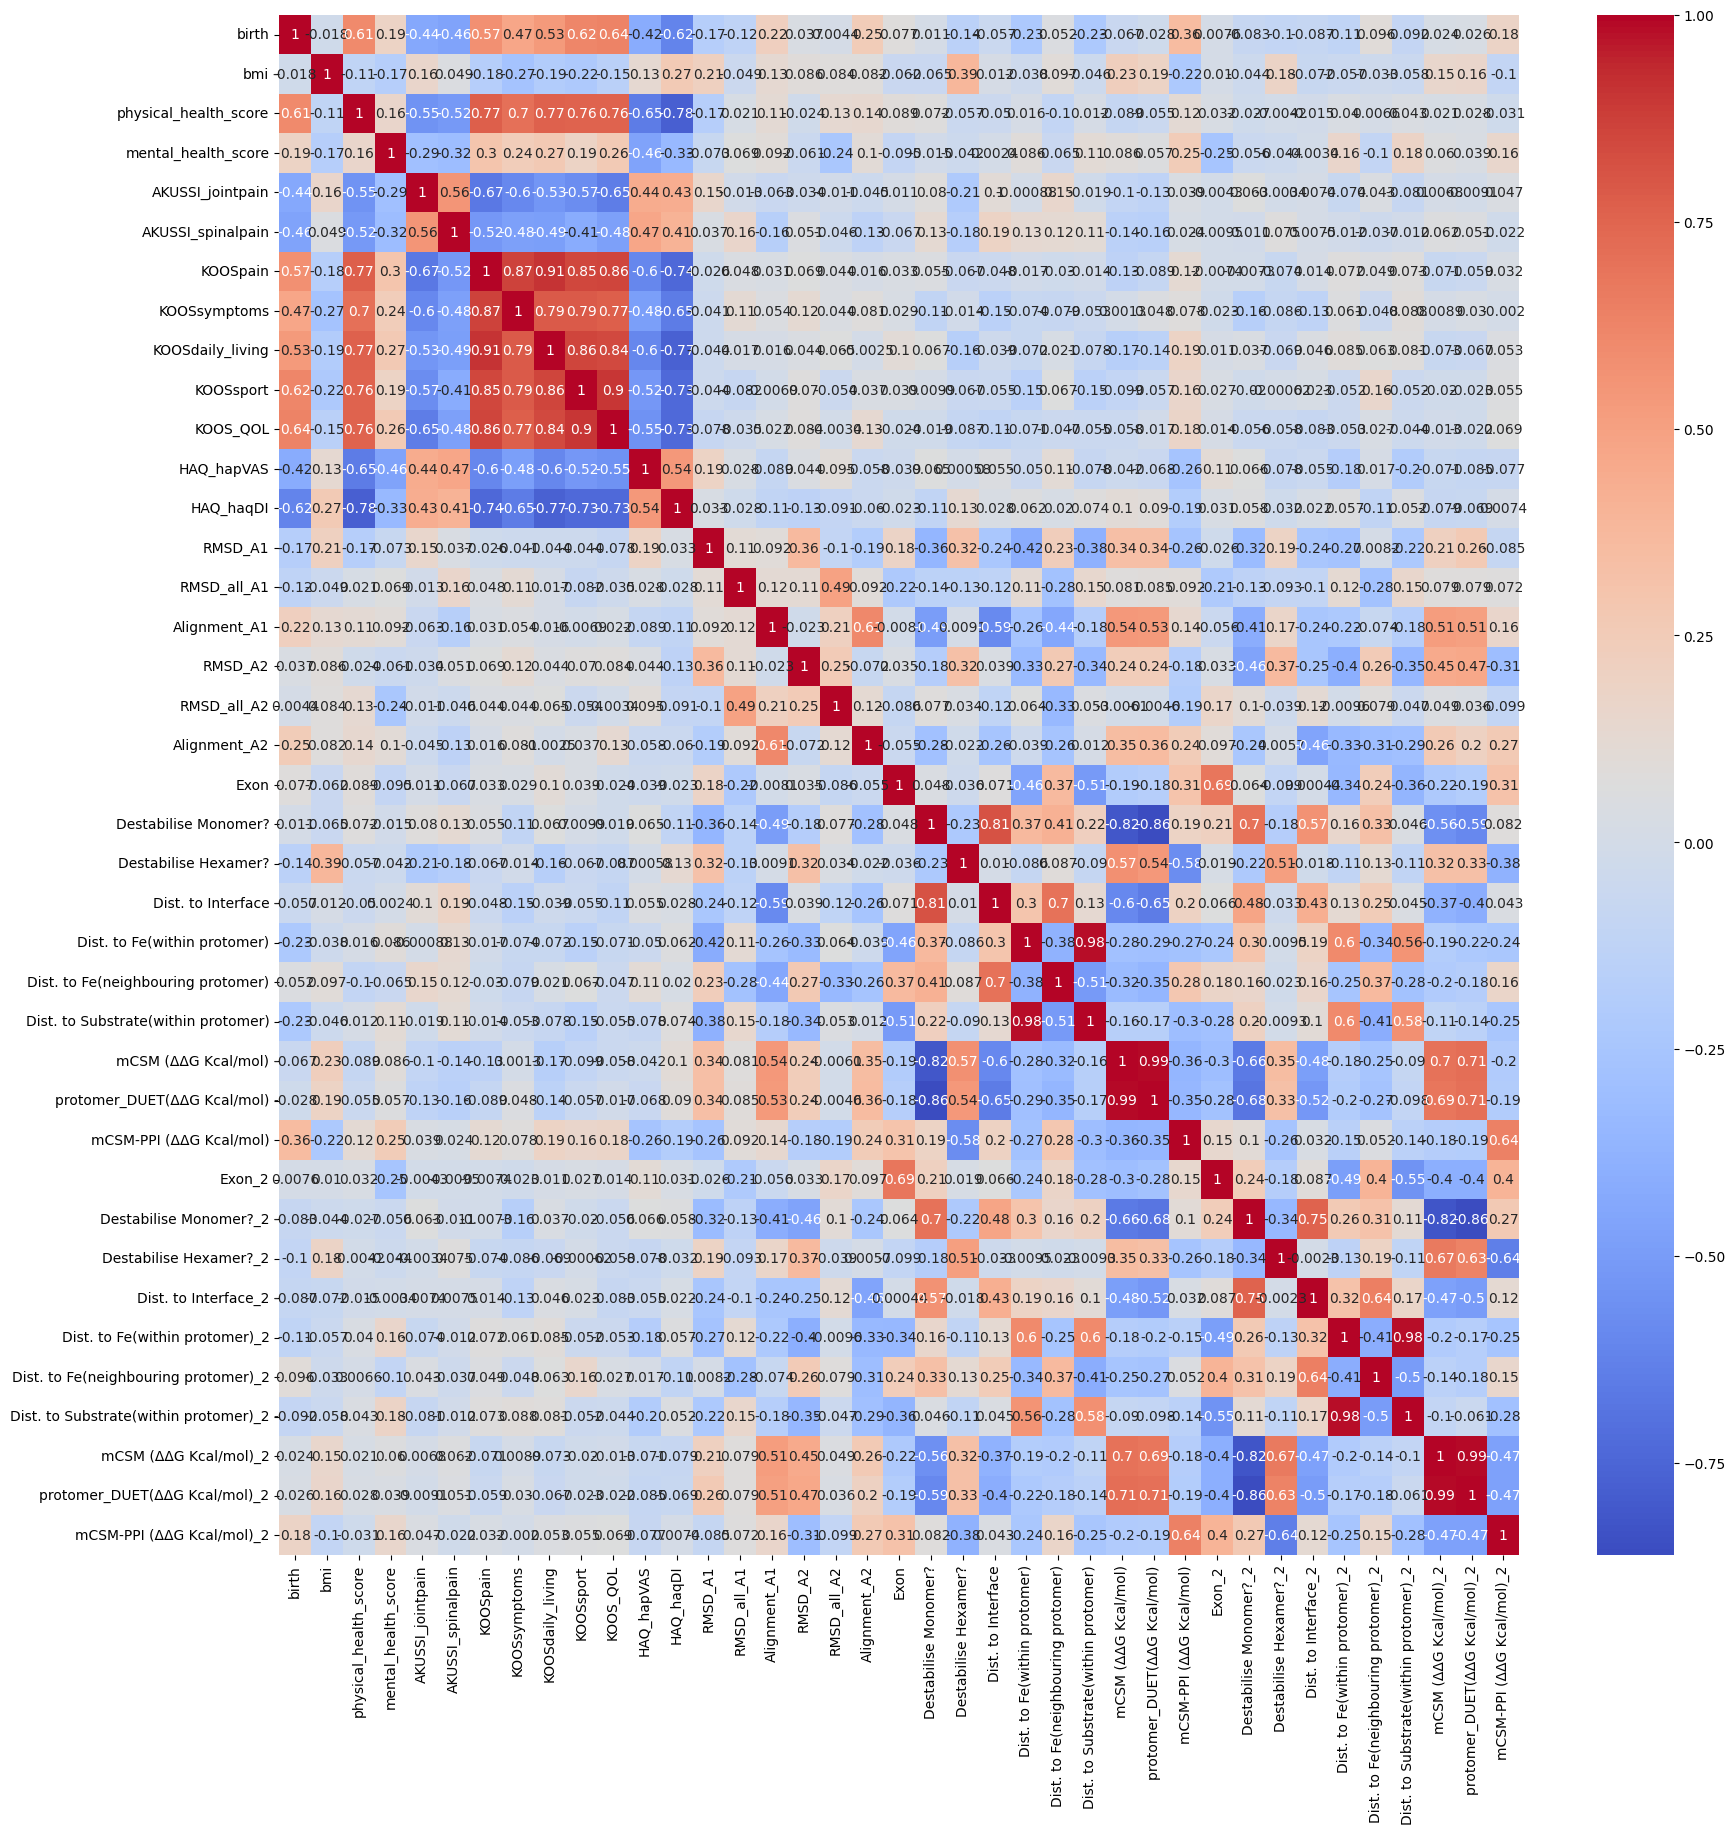

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Strong negative correlation between mCSM, protomer_DUET and 'destabilise monomer?'

# Classification

In [15]:
df['sex'].value_counts()

M    47
F    28
Name: sex, dtype: int64

In [16]:
# make M -1 and F 1
df['sex'].replace({'M': -1, 'F': 1}, inplace=True)

In [17]:
'''labels = df[['Protein change allele 1 ', 'Protein change allele 2',
           'physical_health_score', 
           'mental_health_score', 
           'AKUSSI_jointpain', 'AKUSSI_spinalpain', 
           'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL', 
           'HAQ_hapVAS', 'HAQ_haqDI'
           ]]'''

labels_cols = ['Protein change allele 1 ', 'Protein change allele 2',
              'physical_health_score', 
              'mental_health_score', 
              'AKUSSI_jointpain', 'AKUSSI_spinalpain', 
              'KOOSpain', 'KOOSsymptoms', 'KOOSdaily_living', 'KOOSsport', 'KOOS_QOL', 
              'HAQ_hapVAS', 'HAQ_haqDI'
              ]

In [24]:
len(df)

75

In [23]:
df_g161r = df[(df['Protein change allele 1 ']=='G161R') & (df['Protein change allele 2']=='G161R')]
len(df_g161r)

13

In [25]:
# see value_counts() for the pair ('Protein change allele 1 ', 'Protein change allele 2')
pair = df['Protein change allele 1 '].str.cat(df['Protein change allele 2'], sep=' - ')
pair.value_counts()

G161R - G161R    13
A122V - A122V    10
M368V - M368V     5
R53Q - R53Q       4
G161R - V300G     3
E401Q - E401Q     2
I216T - G360R     2
P230S - P230S     2
P230S - V300G     2
G161R - M368V     2
M368V - P230S     2
G123A - G123A     2
E168K - E168K     2
G161R - R53Q      2
G161R - G152R     1
F73L - G360R      1
G170A - I216T     1
G161R - G270R     1
G185R - P230S     1
G361R - P332R     1
W97G - P230S      1
G161R - T167I     1
S47L - S47L       1
W97C - W97C       1
G161R - F227S     1
C120F - C120F     1
G161R - I346T     1
S150L - G161R     1
G161R - E178G     1
G360A - A122V     1
R225P - I216T     1
L116P - L116P     1
A267V - A267V     1
I346T - G161R     1
G362E - M368V     1
E178G - G161R     1
Name: Protein change allele 1 , dtype: int64

In [26]:
X = df.drop(columns = labels_cols)
X = X.drop(columns = ['structure_allele1', 
                      'structure_allele2', 
                      'pdb_file_allele1', 
                      'pdb_file_allele2', 
                      'patient',
                      'Protein Variant',
                      'Protein Variant_2'
                      ])

In [20]:
X_g161r = df_g161r.drop(columns = labels_cols)
X_g161r = X_g161r.drop(columns = ['structure_allele1', 
                        'structure_allele2', 
                        'pdb_file_allele1', 
                        'pdb_file_allele2', 
                        'patient',
                        'Protein Variant',
                        'Protein Variant_2'
                        ])

In [27]:
X.dtypes

sex                                        int64
birth                                    float64
bmi                                      float64
RMSD_A1                                  float64
RMSD_all_A1                              float64
Alignment_A1                             float64
RMSD_A2                                  float64
RMSD_all_A2                              float64
Alignment_A2                             float64
Exon                                     float64
Destabilise Monomer?                     float64
Destabilise Hexamer?                     float64
Dist. to Interface                       float64
Dist. to Fe(within protomer)             float64
Dist. to Fe(neighbouring protomer)       float64
Dist. to Substrate(within protomer)      float64
mCSM (ΔΔG Kcal/mol)                      float64
protomer_DUET(ΔΔG Kcal/mol)              float64
mCSM-PPI (ΔΔG Kcal/mol)                  float64
Exon_2                                   float64
Destabilise Monomer?

#### Target 

In [28]:
y = df['physical_health_score']

In [21]:
y_g161r = df_g161r['physical_health_score']

In [29]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_g161r = scaler.transform(X_g161r)

/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [31]:
k_fold = KFold(n_splits = 5)

parameters = {'n_estimators': [100, 200, 300], 'max_depth': [30, 40, 50], 'criterion' : ['squared_error'] }

grid = GridSearchCV(
    estimator=RandomForestRegressor(), 
    param_grid = parameters, 
    cv = k_fold, 
    verbose = 10, 
    scoring = 'neg_mean_squared_error')

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 1/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-43.837 total time=   0.1s
[CV 2/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 2/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-58.782 total time=   0.0s
[CV 3/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 3/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-67.876 total time=   0.0s
[CV 4/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 4/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-97.424 total time=   0.0s
[CV 5/5; 1/9] START criterion=squared_error, max_depth=30, n_estimators=100.....
[CV 5/5; 1/9] END criterion=squared_error, max_depth=30, n_estimators=100;, score=-50.127 total tim

In [32]:
# number of estimator and depth of best model
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# fit the best model on the training data
best_model.fit(X_train, y_train)

# test the model
y_pred = best_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 112.9450239130435, MAE: 9.109565217391307, R2: 0.11460956032719827


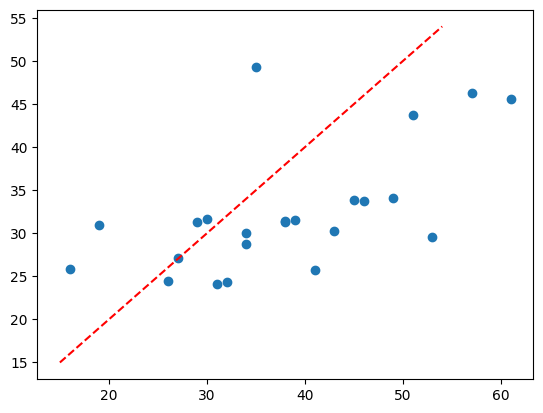

In [35]:
plt.scatter(y_test, y_pred)
# plot the line of best fit
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')

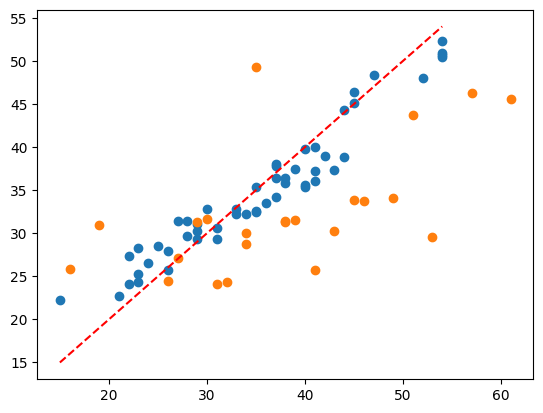

In [36]:
# see for train
y_pred_train = best_model.predict(X_train)
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred)
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')
plt.show()

In [53]:
### define X_train_g161r as the intersection of X_train and X_g161r
X_train.shape, X_g161r.shape

((52, 29), (13, 29))

In [60]:
for i in range(len(X_train)):
    if abs(X_train[i] - X_g161r[i]) < 1e-10:
        print(i)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [37]:



y_pred_train_g161r = best_model.predict(X_g161r)

y_pred_g161r = best_model.predict(X_g161r)
plt.scatter(y_g161r, y_pred_g161r)
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')
plt.show()

NameError: name 'y_pred_train_' is not defined

## Leave one out

In [40]:
# leave one out cross validation

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV, LeaveOneOut

k_fold = LeaveOneOut()
k_fold.get_n_splits(X_train, y_train)

exponents = np.arange(-15, -1)
parameters = {'alpha': 10.0**exponents}

grid = GridSearchCV(
    estimator = Ridge(), 
    param_grid = parameters, 
    cv = k_fold, 
    scoring = 'neg_mean_squared_error'
    )

In [41]:
# fit the model
grid.fit(X_train, y_train)

/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.22134e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.10474e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.04828e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/irene/VSCodeProjects/CHL-Project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.69435e-18): result may not be accurate.
  return lina

GridSearchCV(cv=LeaveOneOut(), estimator=Ridge(),
             param_grid={'alpha': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])},
             scoring='neg_mean_squared_error')

In [42]:
# get the best model
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [43]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 193.8132511313386, MAE: 10.860020138477065, R2: -0.5193267811931792


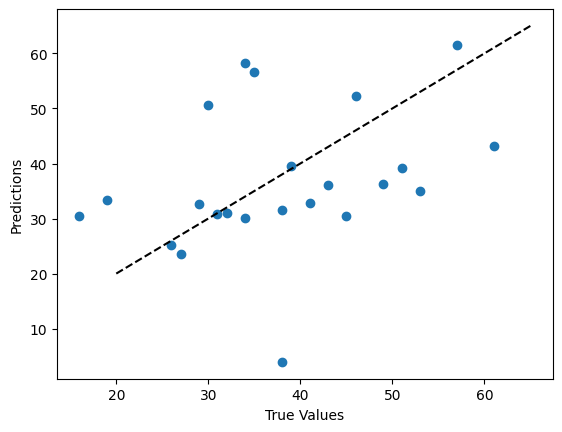

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(np.linspace(20, 65), np.linspace(20, 65), color='black', linestyle='--')

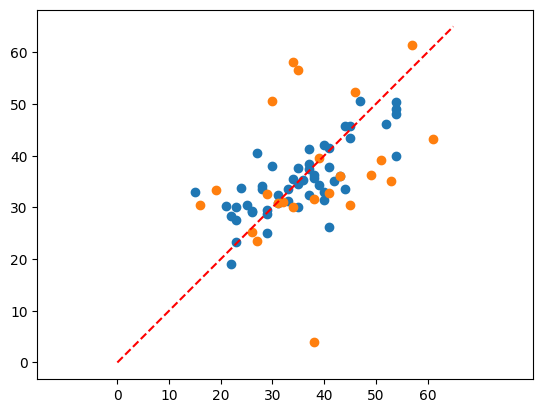

In [65]:
y_pred_train = best_model.predict(X_train)
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, 65), np.linspace(0, 65), color='red', linestyle='--')
plt.xticks(np.arange(0, 70, 10))
plt.yticks(np.arange(0, 70, 10))
plt.axis('equal')
plt.show()

## Let's try with mental health score

In [154]:
y=df['mental_health_score']

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
k_fold = KFold(n_splits=10)

parameters = {'n_estimators': [10, 20, 30 ,40, 50], 'max_depth': [3, 5, 8, 10], 'criterion' : ['squared_error'] }

grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid = parameters, cv=k_fold, verbose =10, scoring='explained_variance')

grid.fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 1/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=0.270 total time=   0.0s
[CV 2/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 2/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=-0.029 total time=   0.0s
[CV 3/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 3/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=0.269 total time=   0.0s
[CV 4/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 4/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=0.023 total time=   0.0s
[CV 5/10; 1/20] START criterion=squared_error, max_depth=3, n_estimators=10.....
[CV 5/10; 1/20] END criterion=squared_error, max_depth=3, n_estimators=10;, score=0.016 total time=   0

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='explained_variance', verbose=10)

In [157]:
best_model = grid.best_estimator_

In [158]:
best_model

RandomForestRegressor(max_depth=5, n_estimators=10)

In [159]:

# test the model
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 199.28457811512786, MAE: 11.833894102263333, R2: -0.5251517870273235


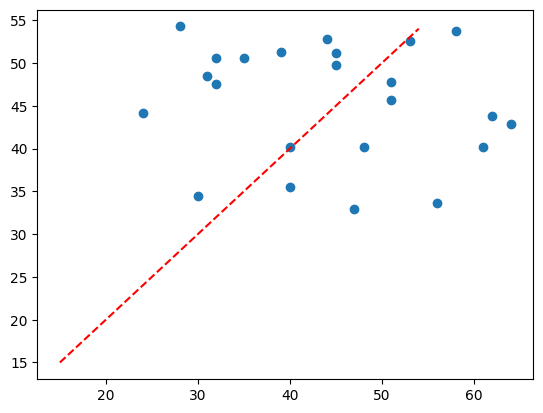

In [160]:
plt.scatter(y_test, y_pred)
# plot the line of best fit
plt.plot(np.arange(15, 55), np.arange(15, 55), color='red', linestyle='--')